In [99]:
from brian2 import *

start_scope()

In [100]:
%matplotlib inline

In [101]:
20*volt

20. * volt

In [102]:
10*nA*20*mV

200. * pwatt

In [103]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, method = "exact")
print('v before: %s' % G.v[0])
run(100*ms)
print("v after: %s" % G.v[0])

v before: 0.0
v after: 0.9999546000702376


In [104]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

Expected value of v = 0.9999546000702375


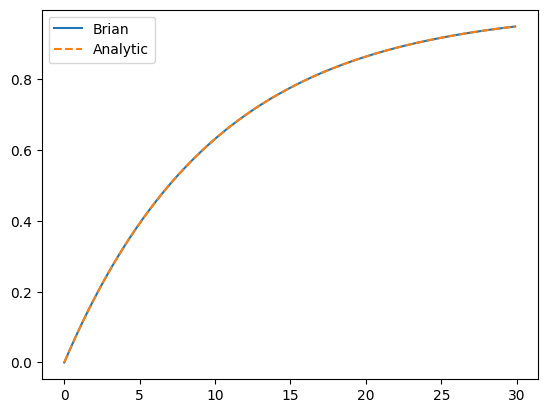

In [105]:
G = NeuronGroup(1, eqs, method = "exact")
M = StateMonitor(G, 'v', record=True)
run(30*ms)
plot(M.t/ms, M.v[0], label = "Brian")
plot(M.t/ms, 1 - exp(-M.t/tau), "--", label = "Analytic")
legend()

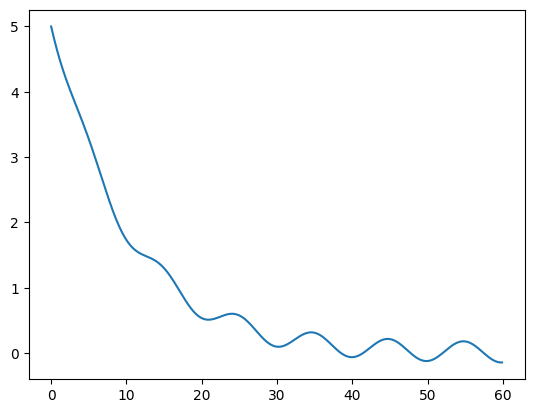

In [106]:
tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t) - v)/tau : 1
'''

G = NeuronGroup(1, eqs, method = "euler")
M = StateMonitor(G, 'v', record=0)

G.v = 5

run(60*ms)

plot(M.t/ms, M.v[0])

Spike times: [16. 37. 58. 79.] ms


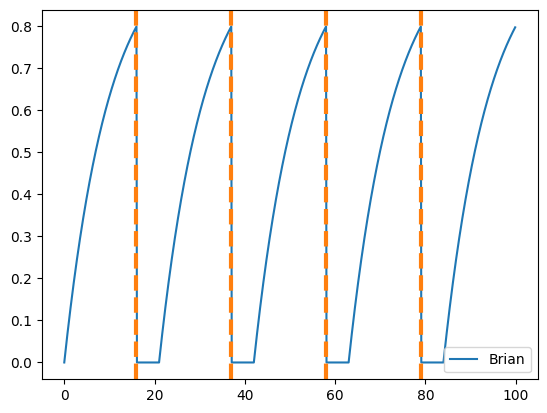

In [107]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold = "v>0.8", reset = "v = 0", refractory = 5*ms, method = "exact")

statemon = StateMonitor(G, 'v', record = 0)
spikemon = SpikeMonitor(G)

run(100*ms)

print('Spike times: %s' % spikemon.t[:])
plot(statemon.t/ms, statemon.v[0], label = "Brian")
for t in spikemon.t:
    axvline(t/ms, ls = '--', c = 'C1', lw = 3)
legend()

Text(0, 0.5, 'Neuron index')

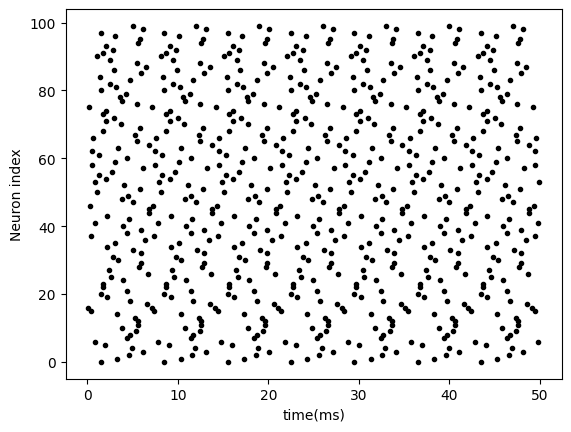

In [111]:
start_scope()

N=100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold = "v>1", reset = "v=0", method = "exact")
G.v = "rand()"

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('time(ms)')
ylabel('Neuron index')

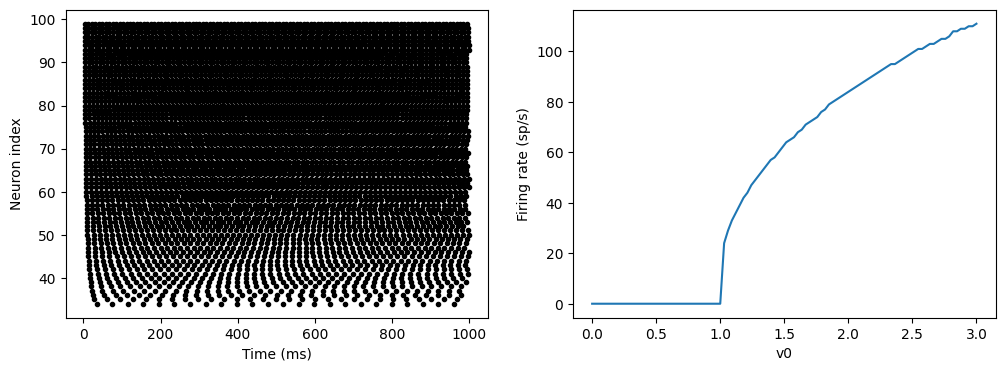

In [112]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

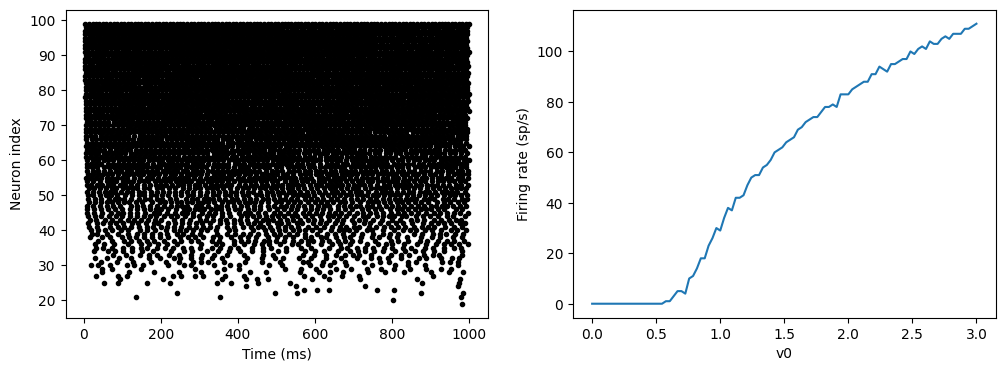

In [113]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');